# Setting

## Load libraries

- `matplotlib`: 最熱門的Python 2D 畫圖套件 [官網](https://matplotlib.org/)
- `seaborn`: 以`matplotlib`為基礎的畫圖套件，可以更容易地探索資料的樣態 [官網](https://seaborn.pydata.org/)

- `pandas`: Python中重要的資料分析套件 [官網](https://pandas.pydata.org/)

In [194]:
# Load library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
# Load library for data precessing
import pandas as pd  

## Set figure size

In [196]:
plt.rcParams['figure.figsize'] = [15, 10]

# 連續資料

## 一維資料

使用UCI資料集中的[北京空氣污染數據](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)為例，資料包括北京市12個測站，2013/3/1~2017/2/28的資料，資料欄位有:

- No: row number 列編號
- year: year of data in this row 年份
- month: month of data in this row 月份
- day: day of data in this row 日期
- hour: hour of data in this row 時間
- PM2.5: PM2.5 concentration (ug/m^3) PM2.5濃度
- PM10: PM10 concentration (ug/m^3) PM10濃度
- SO2: SO2 concentration (ug/m^3) 二氧化硫SO2濃度
- NO2: NO2 concentration (ug/m^3) 二氧化氮NO2濃度
- CO: CO concentration (ug/m^3) 一氧化碳CO濃度
- O3: O3 concentration (ug/m^3) 臭氧O3濃度
- TEMP: temperature (degree Celsius) 氣溫
- PRES: pressure (hPa) 氣壓
- DEWP: dew point temperature (degree Celsius) 露點
- RAIN: precipitation (mm) 雨量
- wd: wind direction 風向
- WSPM: wind speed (m/s) 風速
- station: name of the air-quality monitoring site 測站名稱

上述資料來自[UCI資料集-北京空氣污染數據](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)

首先使用pandas套件的`read_csv()`函數將**Shunyi**測站的csv資料載入Python，並用`head()`函數呈現前五列資料

In [197]:
# Beijing air pollution data downloaded in 
# https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data
df = pd.read_csv('Data/PRSA_Data_Shunyi_20130301-20170228.csv') #''中請取代為操作環境之檔案路徑
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### 直方圖 Histogram 

載入資料後，若想了解某一數據的**分佈**，可用直方圖呈現。
直方圖維度內容如下：
- x軸: 欲了解的數據
- y軸: 通常為個數

在`seaborn`套件中，可直接使用`distplot()`函數，並將欲了解的數據當作參數輸入函數，如`distplot(欲了解的數據)`

ValueError: cannot convert float NaN to integer

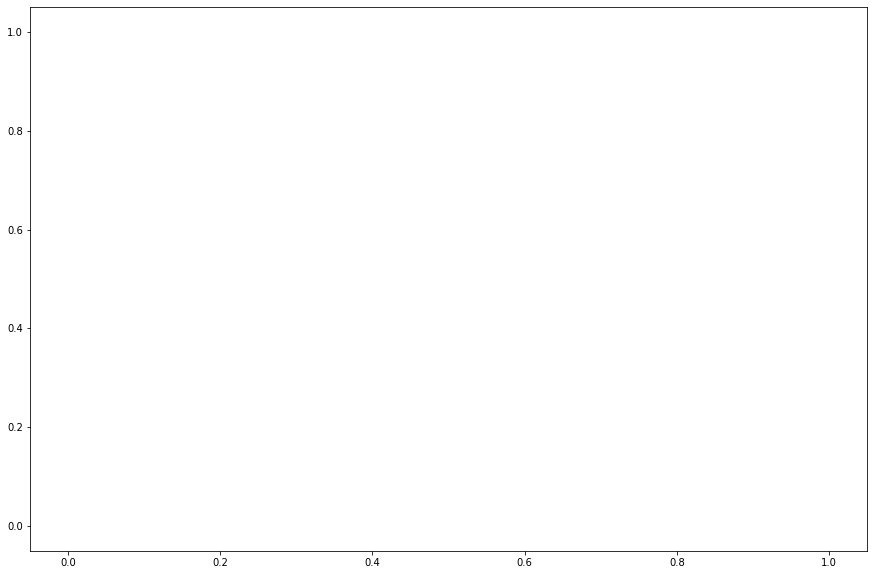

In [198]:
# Data with NaN
sns.distplot(df['PM2.5'])

由上述輸出**Data with NaN**可知，若資料中有空值，會無法做圖。
在資料說明頁面中，也明確指出**Missing data are denoted as NA.**，也就是缺值會使用空值表示。
因此在做圖前需做資料前處理，將空值去除，此時可用`pandas`套件的`dropna()`函數，將輸入資料的空值全部去除。

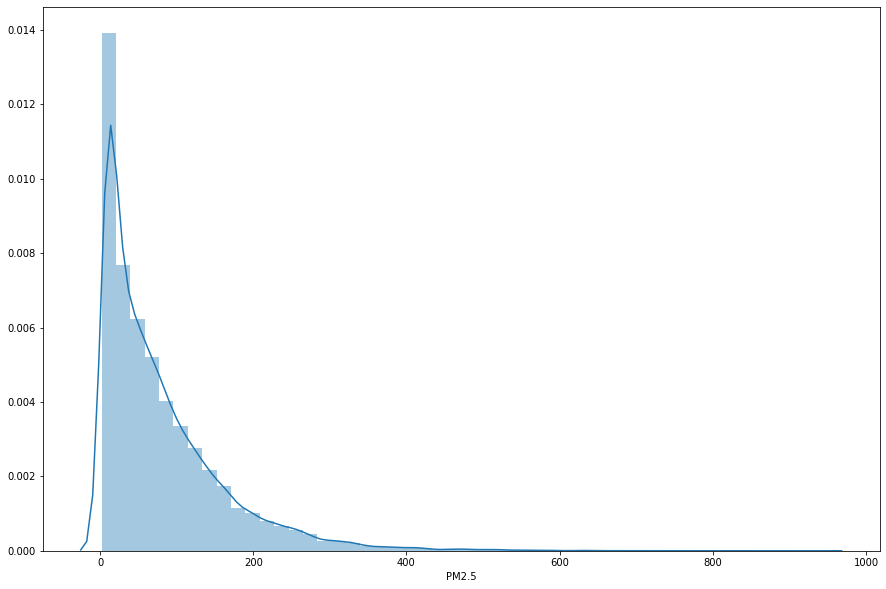

In [199]:
# Remove NaN by .dropna()
sns.distplot(df['PM2.5'].dropna())
plt.show()

由上圖可知，PM2.5濃度集中在0~100左右，只有少部分資料點的濃度大於200，最大濃度接近1000。

同理，若想觀察PM10濃度的分佈，可直接將輸入資料替換為PM10。

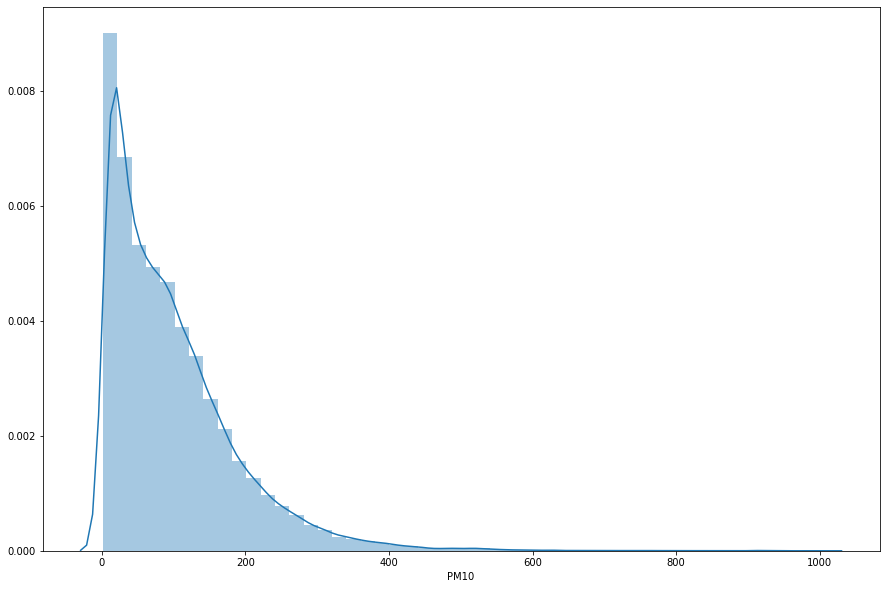

In [200]:
sns.distplot(df['PM10'].dropna())
plt.show()

由上圖可知，PM2.5濃度集中在0~100左右，只有少部分資料點的濃度大於200，最大濃度大於1000。

## 二維資料

在一維資料的視覺化呈現中，我們學會如何觀察連續數據的資料分佈，但若想要知道數據與數據間的關係，如**PM2.5濃度隨時間的變化**，就需要使用二維資料視覺下的方法。
為了呈現各項數據與時間的關係，在此一樣先前範例載入的[北京空氣污染數據](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)，並進一步將年/月/日/小時等欄位合併，並使用`pandas`的`to_datetime()`函數將原本的**字串型態**轉為**日期型態**。

In [201]:
# Parse String To DateTime
df['DateTime']=pd.to_datetime(df['year'].map(str) +'/'+df['month'].map(str) +'/'+df['day'].map(str) +
               ' '+df['hour'].map(str)+':'+'00', 
               format='%Y/%m/%d %H:%M')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,DateTime
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi,2013-03-01 00:00:00
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi,2013-03-01 01:00:00
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi,2013-03-01 02:00:00
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi,2013-03-01 03:00:00
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi,2013-03-01 04:00:00


### 折線圖 Line chart

如何呈現**每天** **PM2.5濃度**的變化？

可使用`seaborn`套件的`lineplot()`函數畫折線圖，此函數需要兩個參數，分別為`x`與`y`

- x軸：日期
- y軸：PM2.5濃度


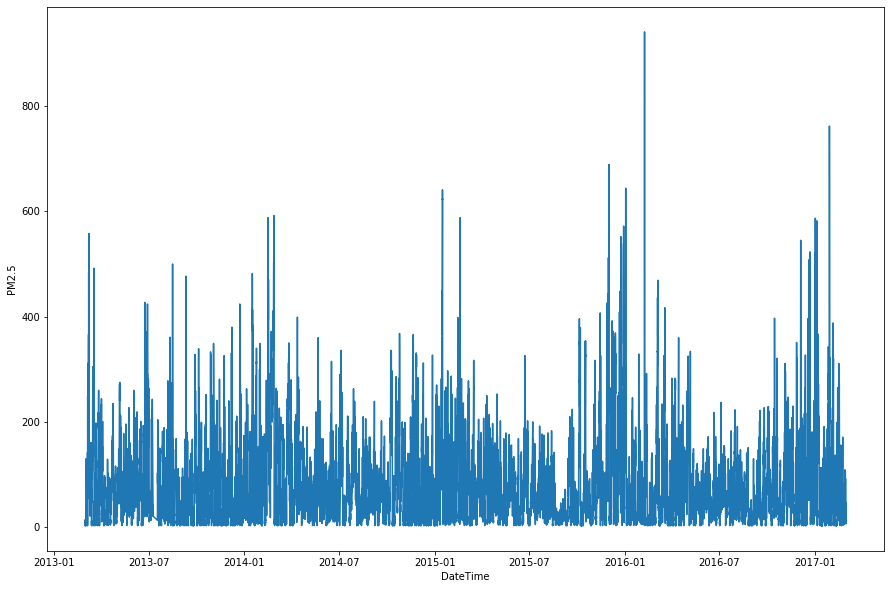

In [202]:
sns.lineplot(x=df['DateTime'], y=df['PM2.5'])
plt.show()

將資料畫出來後，很明顯的因資料點數太多，所有濃度起伏都集中在一起，無法判讀。由資料介紹可知，此份資料包含2013/3/1~2017/2/28的資料，為了呈現清楚，我們可挑選部分重要的片段來做圖。此範例挑選最新(2017年前半年)的資料`df2017`做折線圖，使用`pandas`套件的`loc[]`方法將資料取出，使用方式為`df.loc[篩選條件]`。

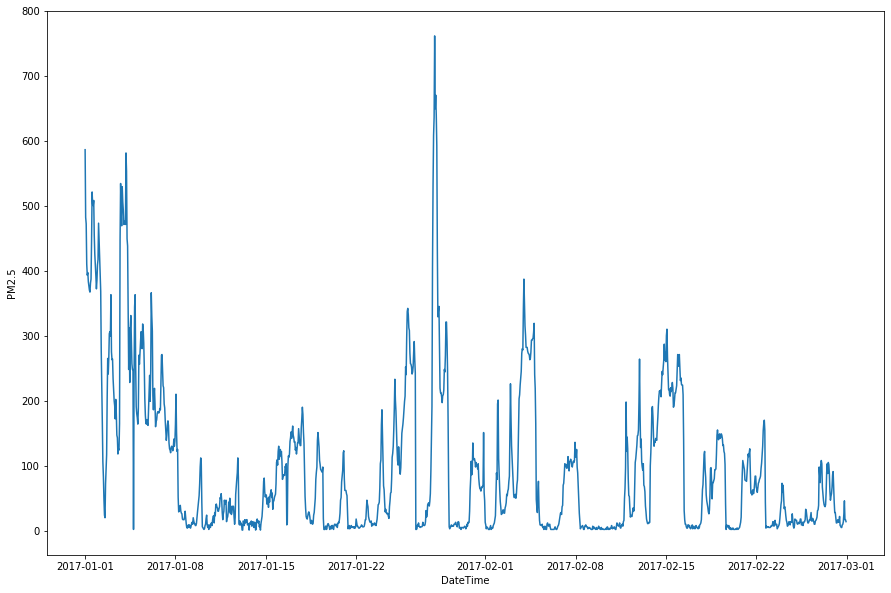

In [203]:
df2017=df.loc[((df['year']==2017) & (df['month']<=6))]
sns.lineplot(df2017['DateTime'], df2017['PM2.5'])
plt.show()

由上圖可知，Shunyi測站在2017/1/1~2017/2/28的PM2.5濃度起伏，最高點出現在大概一月底的時候，並可觀察到週期性的高低起伏，其中2017/2/8後約一週PM2.5濃度很低，可進一步推測原因。

### 管致圖 Control chart
管制圖可視為折線圖的延伸，如上圖所示，因PM2.5濃度在自然狀態下就會高低起伏，如何判斷正常的變化以及**不正常**的變化就變得非常重要，使用管制圖可快速判斷**不正常**的數值起伏。
如需了解更多管制圖的背景知識，可參考[wiki](https://zh.wikipedia.org/wiki/%E7%AE%A1%E5%88%B6%E5%9C%96)

在此使用平均值加減**兩倍標準差**以及加減**三倍標準差**當作管制界線，並使用`matplotlib`套件的`axhline()`函數將平均值與管制界線加入原有的折線圖中。因`seaborn`是基於`matplotlib`套件為基礎開發的更高階套件，因此圖形可直接疊加。
以下範例中`axhline()`函數共有以下輸入參數
- y: 計算平均值`mean()`，計算標準差`std`，`skipna=True`為跳過空值
- color: 修改線條顏色 （綠色g、黃色y、紅色r），其他顏色設定可參考[文件](https://matplotlib.org/tutorials/colors/colors.html)
- linestyle: 修改線條樣式 （虛線），其他樣式設定可參考[文件](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)

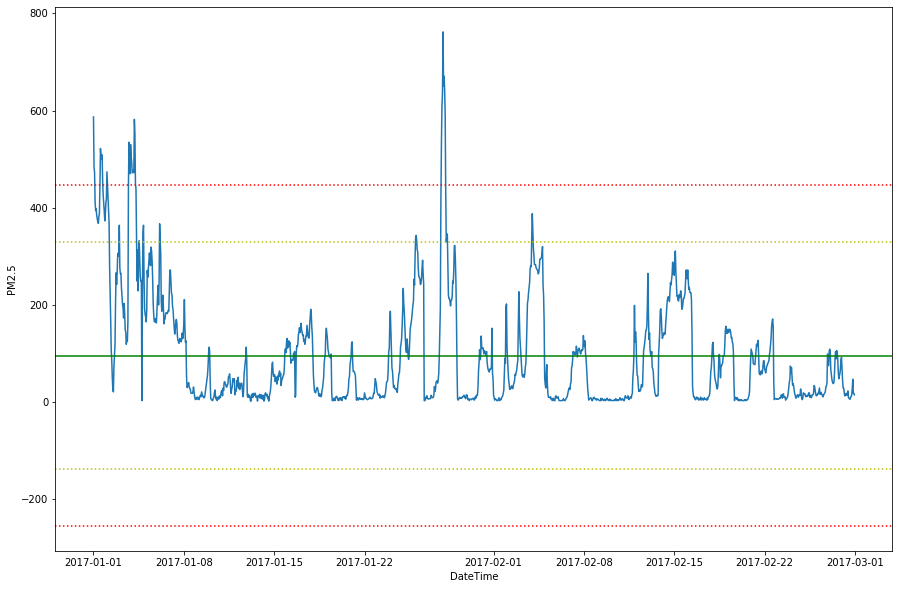

In [204]:
sns.lineplot(df2017['DateTime'], df2017['PM2.5'])
plt.axhline(y=df2017['PM2.5'].mean(skipna=True), color='g', linestyle='-')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)+2*df2017['PM2.5'].std(), color='y', linestyle=':')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)-2*df2017['PM2.5'].std(), color='y', linestyle=':')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)+3*df2017['PM2.5'].std(), color='r', linestyle=':')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)-3*df2017['PM2.5'].std(), color='r', linestyle=':')
plt.show()

由上圖可知，若以三倍標準差當作管制界線，一月初與一月底的幾個高峰可能為不正常變化，應考慮調查造成此變化的原因。

### 散佈圖 Scatter plot 

除了PM2.5濃度的數值分佈、PM2.5濃度隨著時間的變化外，我們可能也會對各項空污數據間的關聯性有興趣，此時可以用**散佈圖**將有興趣的濃度分別放在x軸與y軸。在Python中，可用`seaborn`套件的`scatterplot()`函數作圖，輸入函數有x軸與y軸數據，分列如下：

- x軸：PM2.5濃度
- y軸：PM10濃度

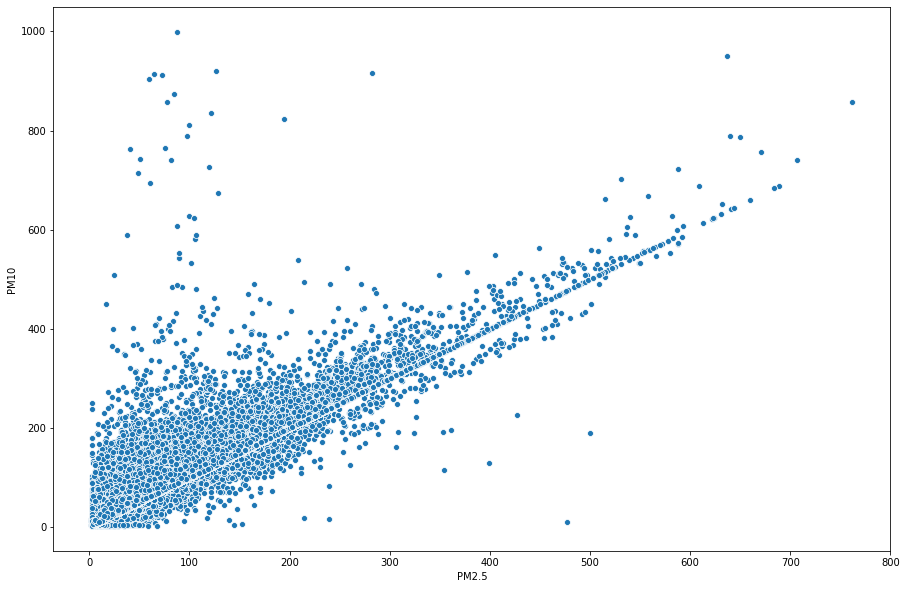

In [205]:
sns.scatterplot(df['PM2.5'],df['PM10'])
plt.show()

由上圖可知，PM2.5和PM10的資料分佈有一定關係，為了將此關係視覺化，可在散佈圖加上迴歸線。

## 散佈圖 Scatter plot + 迴歸線
在散佈圖中加上迴歸線可使用`seaborn`套件的`regplot()`函數，使用方法與`scatterplot()`函數相同。

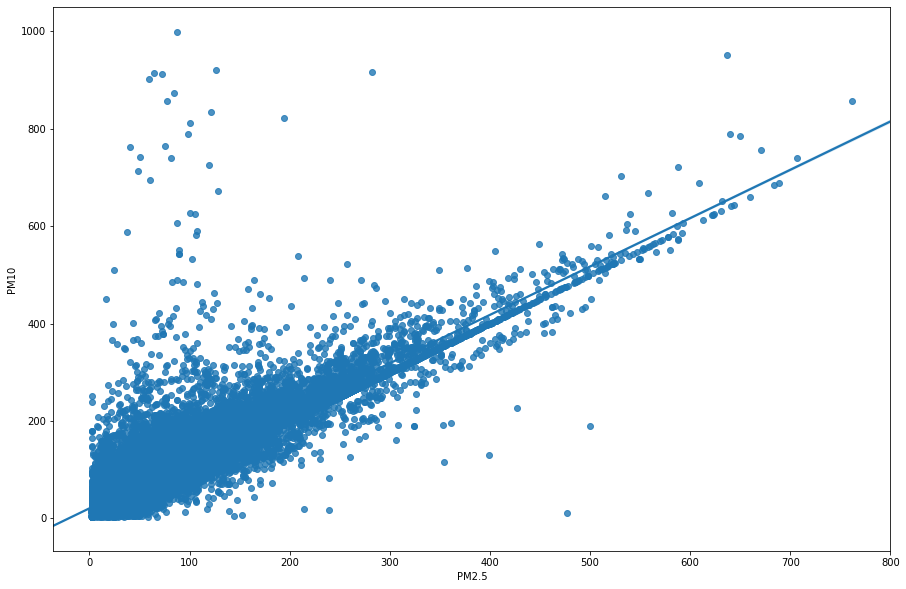

In [206]:
sns.regplot(df['PM2.5'],df['PM10'])
plt.show()

### 一次畫多個散佈圖 Pair plot
`seaborn`套件提供一進階函數`pairplot()`，直接使用此函數可針對表格中所有資料畫散佈圖。

/Users/yjtseng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/yjtseng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



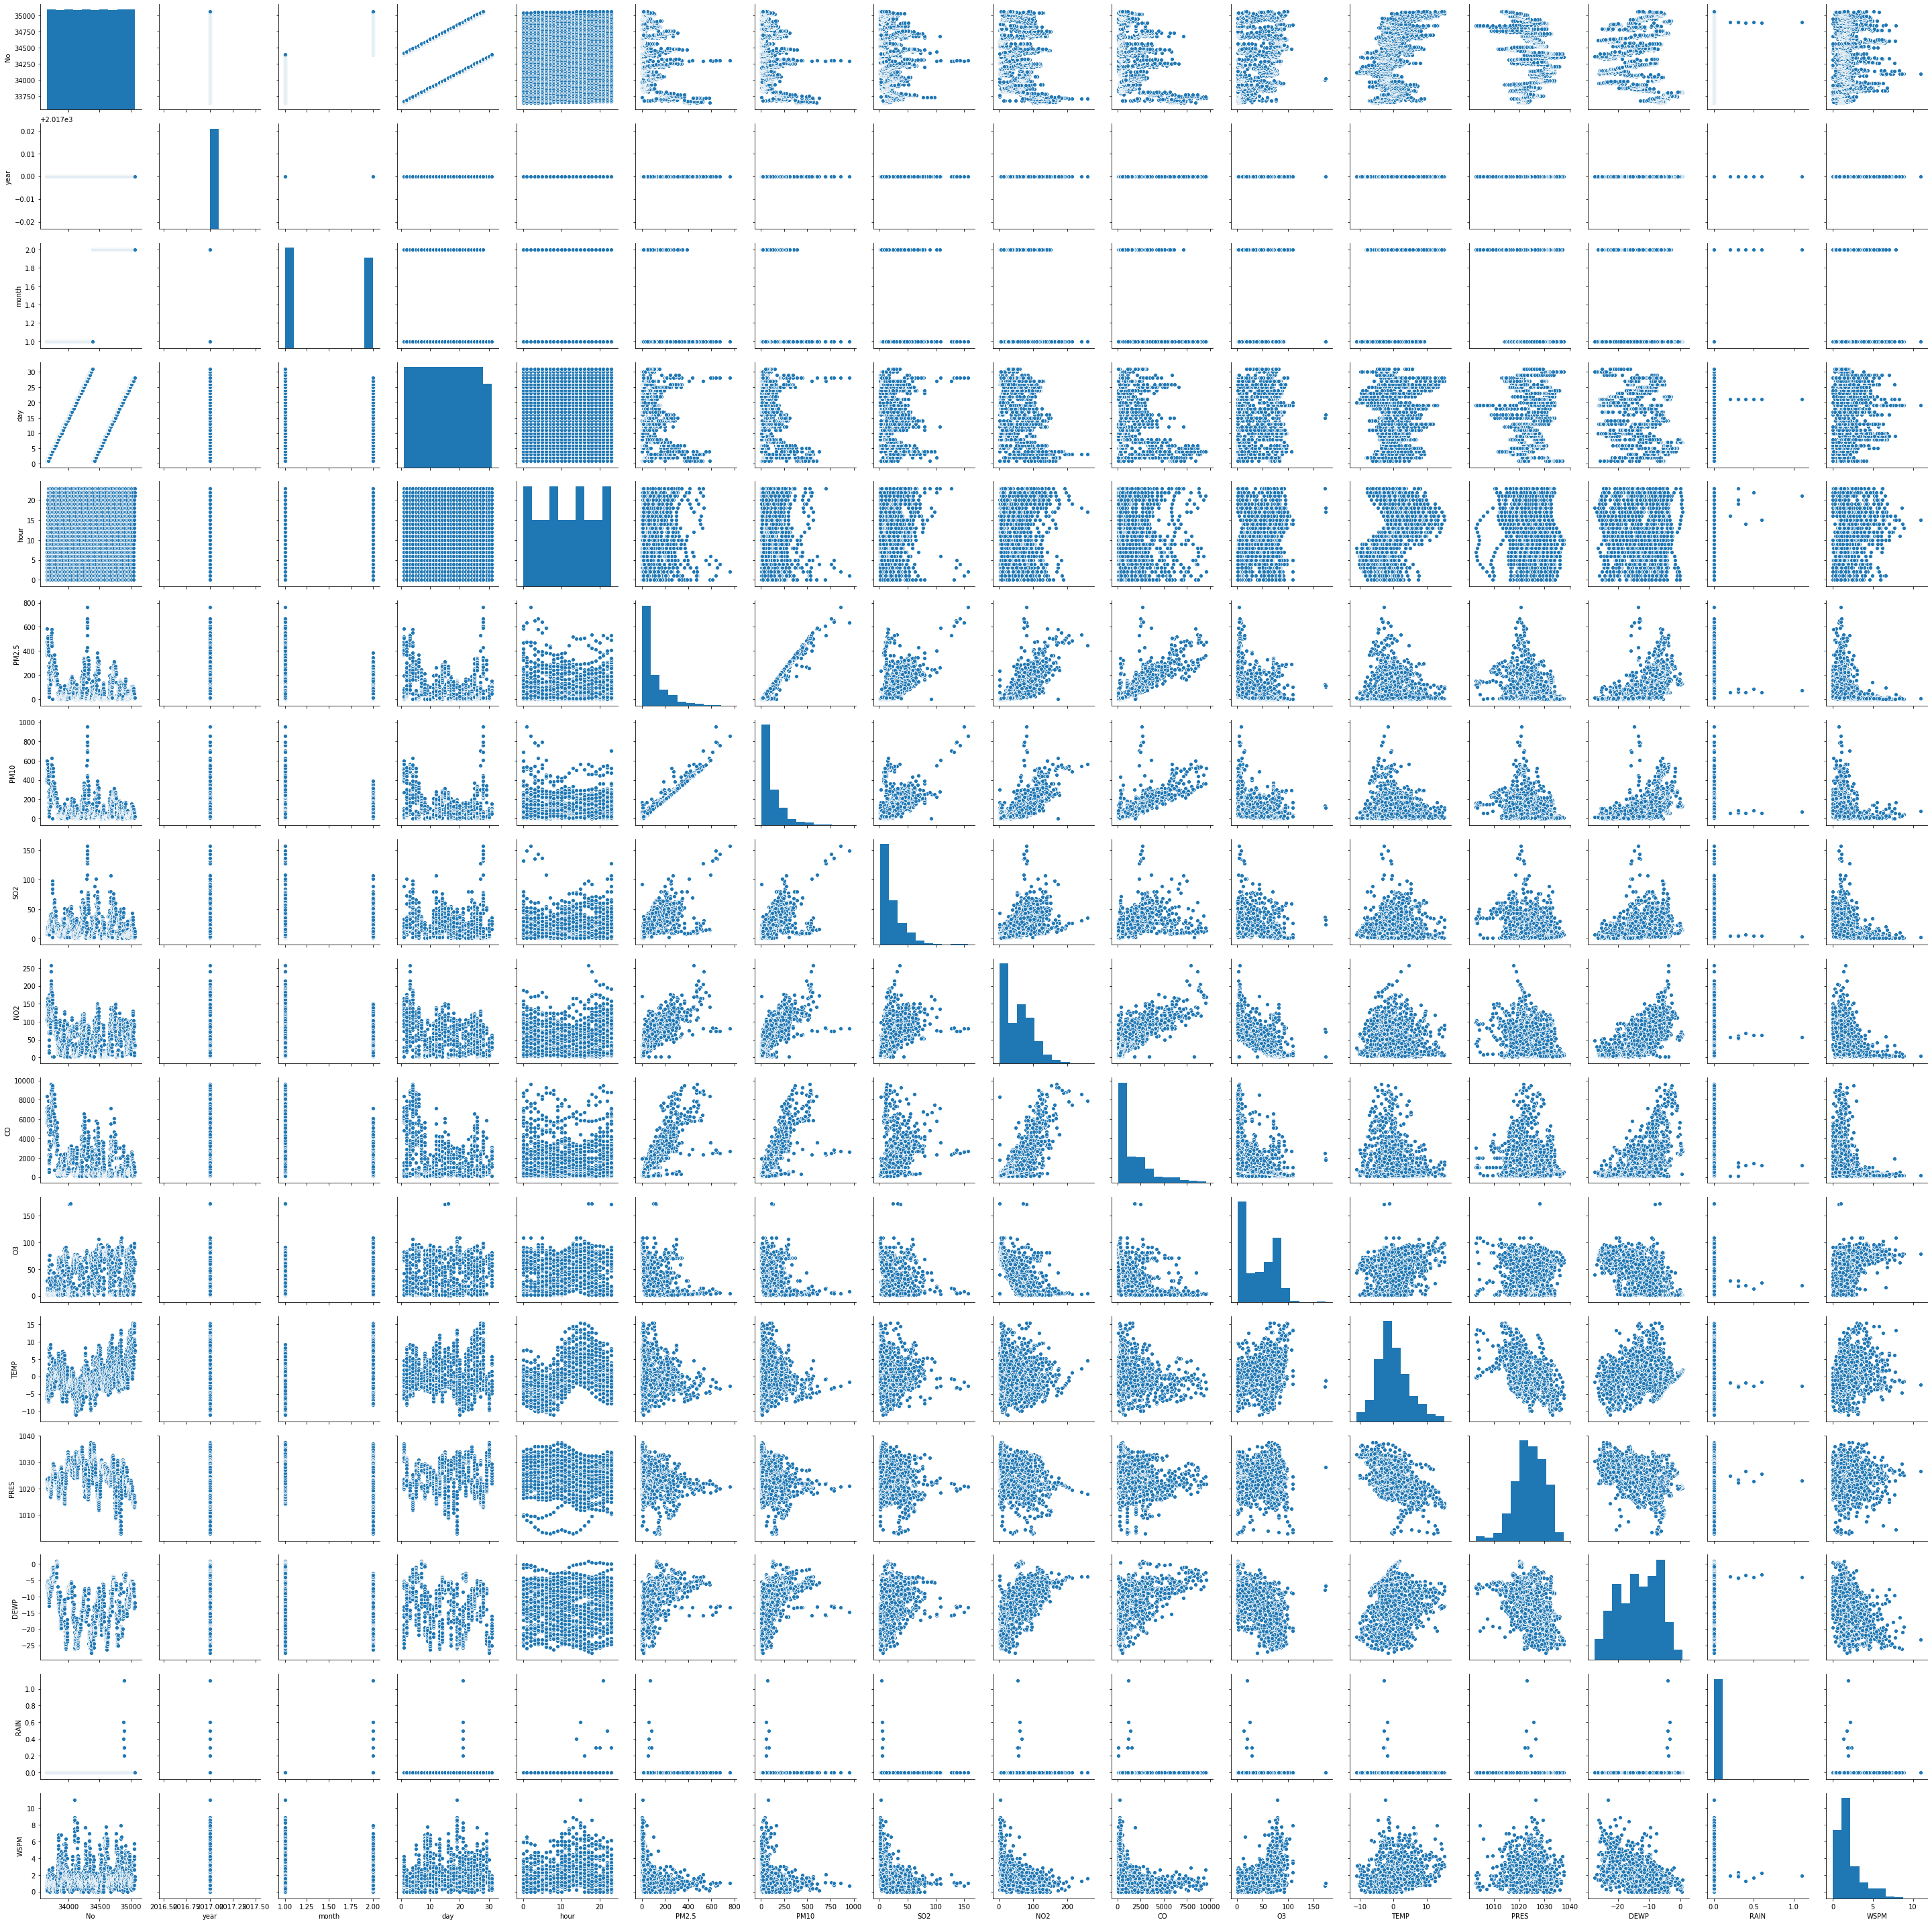

In [207]:
sns.pairplot(df2017)
plt.show()

## 連續+類別資料

### 圓餅圖 Pie chart

若想呈現變數與變數間的關係，或是想將變數的統計資料視覺化，但其中一個變數為類別變量，則可用圓餅圖或是長條圖呈現。
以上述[北京空氣污染數據](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)為例，若想看資料集的風向個數（意即每個風向出現在幾天的資料中），及可考慮使用長條圖或是圓餅圖。
首先使用`pandas`的`groupby().size().reset_index()`計算資料中個風向的計數資料，並儲存成`wddf`變數。

並使用`matplotlib`套件的`pie()`函數作圖，在此範例中，放入兩個參數，分別為
- x: 圓餅圖角度大小分配依據
- labels: 各角度的資料標籤

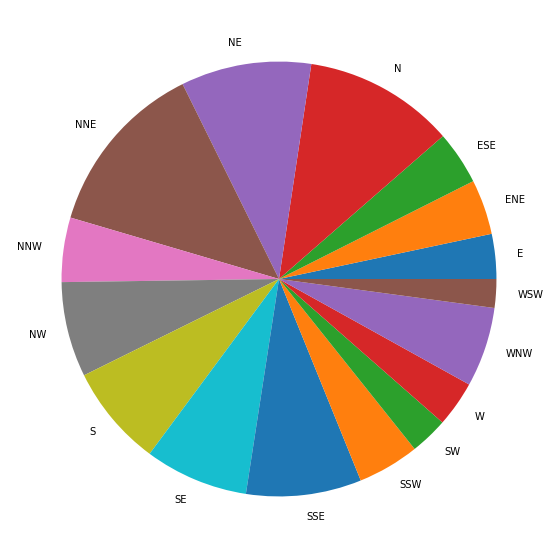

In [208]:
wddf=df.groupby('wd').size().reset_index(name='size')
plt.pie(x=wddf['size'],labels=wddf['wd'])
plt.show()

由上圖所示，其實非常難分辨出到底哪個風向佔較多天，通常圓餅圖不適合使用在太多分類的資料中，三～四個分類項目就是極限了，因此這個視覺化呈現應選用長條圖。

### 長條圖 Bar chart 

同上述需求，我們想要呈現在此資料中，哪個風向佔較多天，在此可使用`seaborn`套件的`barplot()`函數，其中輸入兩個參數
- x軸: 風向
- y軸: 各風向所佔天數

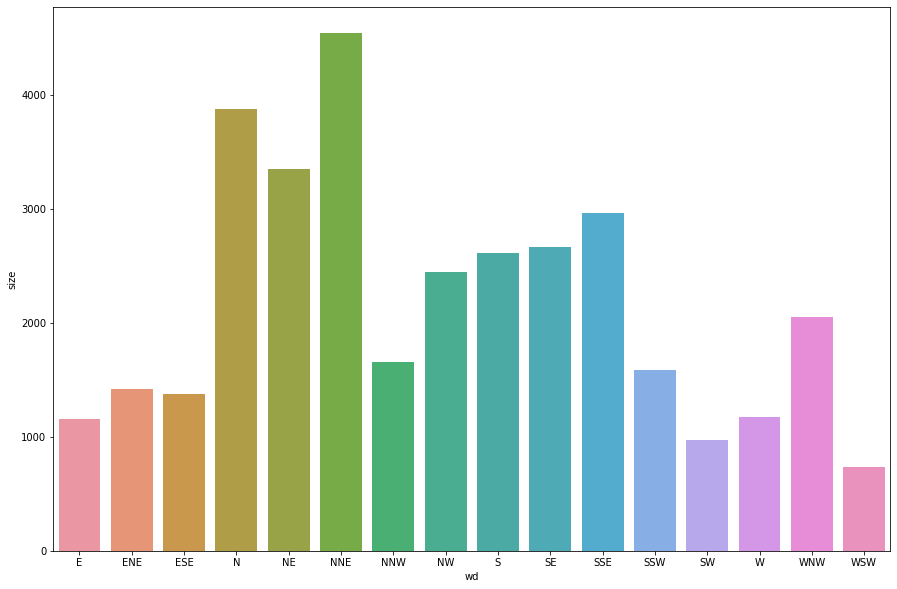

In [209]:
sns.barplot(x=wddf['wd'],y=wddf['size'])
plt.show()

相較於圓餅圖，長條圖更可明顯呈現各風向天數的多寡，由此圖可知此資料區間中，吹NNE風向的天數最多，再來是N，以及NE。

### 盒鬚圖 Box plot

除了用散佈圖得知PM2.5的濃度分佈外，如果想知道**每年** **PM2.5濃度** 的分佈（中位數、四分位差、離群值等）是否有差異，可使用盒鬚圖，盒鬚圖的各點意義如下：

- x軸：年份
- y軸：PM2.5濃度
- 盒（方塊）中線：中位數
- 盒（方塊）上緣：第三 四分位差
- 盒（方塊）下緣：第一 四分位差
- 鬚（線條）上緣：
- 鬚（線條）下緣：
- 點：離群值

使用`seaborn`套件的`boxplot()`函數，可製作盒鬚圖，輸入參數為：
- x軸：年份
- y軸：各年份要比較的數據分佈（此為PM2.5）

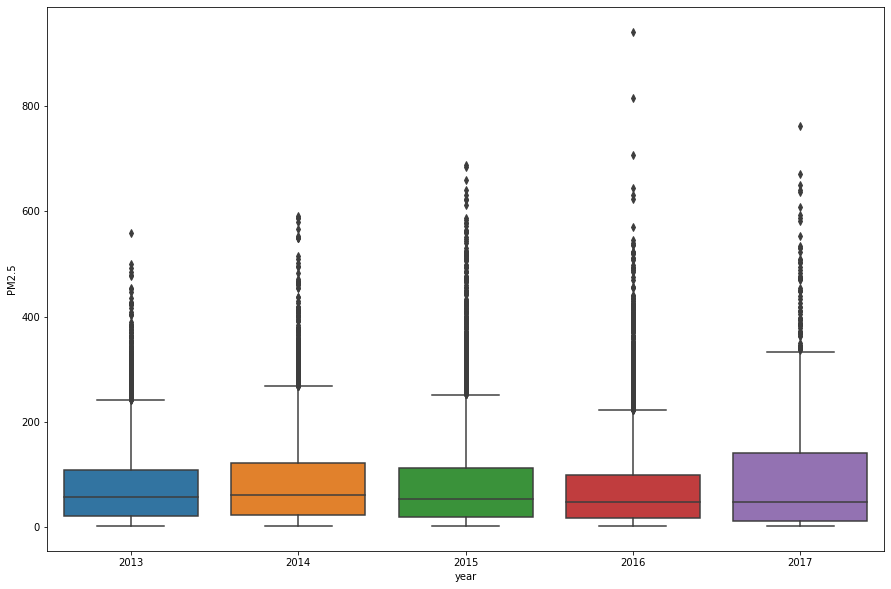

In [210]:
sns.boxplot( x=df["year"], y=df["PM2.5"] )
plt.show()

## 多維資料

In [211]:
# Energy efficiency Data Set downloaded in
# https://archive.ics.uci.edu/ml/datasets/Energy+efficiency
df_e = pd.read_csv('Data/ENB2012_data.csv')  
df_e.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 熱度圖 Heatmap


In [212]:
df2017_wide=df2017[['DateTime','PM2.5','PM10','SO2','NO2']]
df2017_wide=df2017_wide.set_index('DateTime')
df2017_wide

,PM2.5,PM10,SO2,NO2
DateTime,,,,
2017-01-01 00:00:00,587.0,600.0,15.0,142.0
2017-01-01 01:00:00,483.0,516.0,12.0,111.0
2017-01-01 02:00:00,473.0,503.0,10.0,105.0
2017-01-01 03:00:00,411.0,425.0,9.0,102.0
2017-01-01 04:00:00,394.0,394.0,9.0,102.0
...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0
2017-02-28 21:00:00,18.0,28.0,4.0,30.0


In [213]:
normalized_df2017_wide=(df2017_wide-df2017_wide.mean())/df2017_wide.std()
normalized_df2017_wide

,PM2.5,PM10,SO2,NO2
DateTime,,,,
2017-01-01 00:00:00,4.201420,3.953098,-0.309121,2.028133
2017-01-01 01:00:00,3.312244,3.279302,-0.458669,1.300514
2017-01-01 02:00:00,3.226746,3.175024,-0.558367,1.159684
2017-01-01 03:00:00,2.696661,2.549356,-0.608216,1.089269
2017-01-01 04:00:00,2.551315,2.300694,-0.608216,1.089269
...,...,...,...,...
2017-02-28 19:00:00,-0.586449,-0.282191,-0.658065,0.854554
2017-02-28 20:00:00,-0.415454,-0.418555,-0.209423,0.713724
2017-02-28 21:00:00,-0.663397,-0.635132,-0.857462,-0.600685


In [214]:
normalized_df2017_wide = normalized_df2017_wide.transpose()
normalized_df2017_wide

DateTime,2017-01-01 00:00:00,2017-01-01 01:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,2017-01-01 08:00:00,2017-01-01 09:00:00,...,2017-02-28 14:00:00,2017-02-28 15:00:00,2017-02-28 16:00:00,2017-02-28 17:00:00,2017-02-28 18:00:00,2017-02-28 19:00:00,2017-02-28 20:00:00,2017-02-28 21:00:00,2017-02-28 22:00:00,2017-02-28 23:00:00
PM2.5,4.201420,3.312244,3.226746,2.696661,2.551315,2.585514,2.465817,2.414519,2.354670,2.329021,...,-0.765994,-0.765994,-0.731795,-0.723246,-0.689046,-0.586449,-0.415454,-0.663397,-0.663397,-0.689046
PM10,3.953098,3.279302,3.175024,2.549356,2.300694,2.332779,2.573421,2.172351,2.220480,2.292672,...,-0.747431,-0.747431,-0.779517,-0.651175,-0.578982,-0.282191,-0.418555,-0.635132,-0.699303,-0.683260
SO2,-0.309121,-0.458669,-0.558367,-0.608216,-0.608216,-0.608216,-0.608216,-0.658065,-0.658065,-0.658065,...,-0.957160,-0.957160,-0.957160,-0.907311,-0.757764,-0.658065,-0.209423,-0.857462,-0.608216,-0.408820
NO2,2.028133,1.300514,1.159684,1.089269,1.089269,1.065798,1.159684,1.277042,1.230099,1.136213,...,-1.140532,-1.117060,-1.140532,-0.976231,-0.389441,0.854554,0.713724,-0.600685,-0.530271,-0.506799


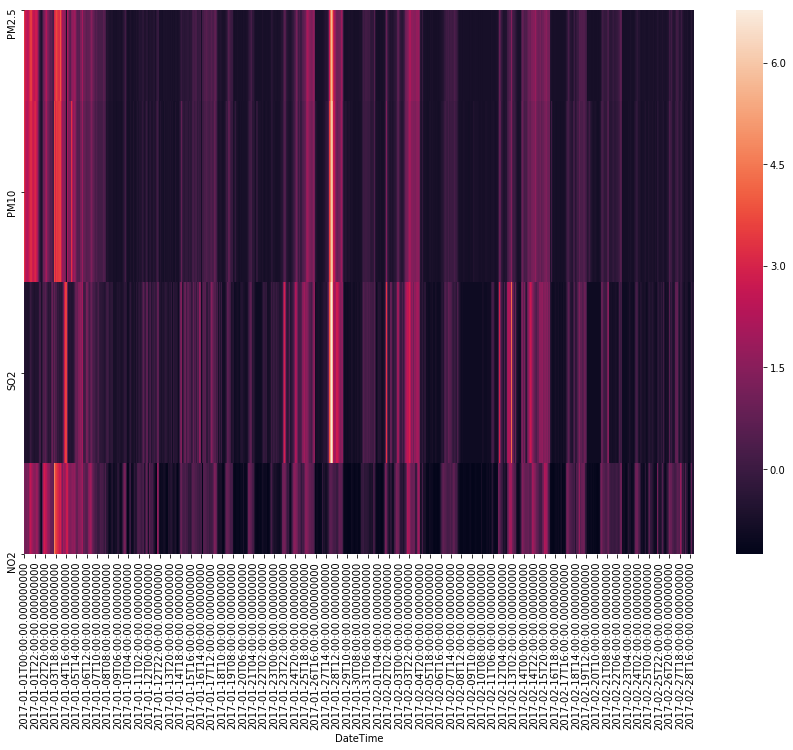

In [215]:
ax = sns.heatmap(normalized_df2017_wide)

In [216]:
import calmap
df2017_cal=df2017[['DateTime','PM2.5']]
df2017_cal=df2017_cal.dropna()
df2017_cal

,DateTime,PM2.5
33648,2017-01-01 00:00:00,587.0
33649,2017-01-01 01:00:00,483.0
33650,2017-01-01 02:00:00,473.0
33651,2017-01-01 03:00:00,411.0
33652,2017-01-01 04:00:00,394.0
...,...,...
35059,2017-02-28 19:00:00,27.0
35060,2017-02-28 20:00:00,47.0
35061,2017-02-28 21:00:00,18.0
35062,2017-02-28 22:00:00,18.0


In [217]:
df2017_cal=df2017_cal.resample('D', on='DateTime').mean()
df2017_cal

,PM2.5
DateTime,
2017-01-01,431.416667
2017-01-02,235.708333
2017-01-03,286.500000
2017-01-04,338.833333
2017-01-05,228.000000
2017-01-06,219.875000
2017-01-07,156.250000
2017-01-08,51.416667
2017-01-09,27.041667


/Users/yjtseng/opt/anaconda3/lib/python3.7/site-packages/calmap/__init__.py:221: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



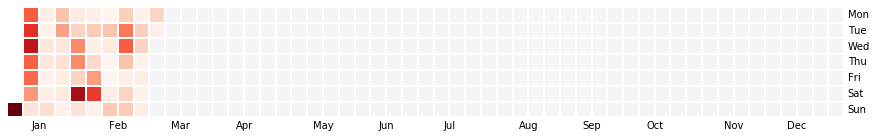

In [218]:
calmap.yearplot(df2017_cal['PM2.5'], year=2017)
plt.show()

### 矩形圖 Tree map

In [219]:
# libraries
import squarify    # pip install squarify (algorithm for treemap)

df = pd.DataFrame({'nb_people':[8,3,4,2], 
                   'group':["group A", "group B", "group C", "group D"] })
df


,nb_people,group
0,8,group A
1,3,group B
2,4,group C
3,2,group D


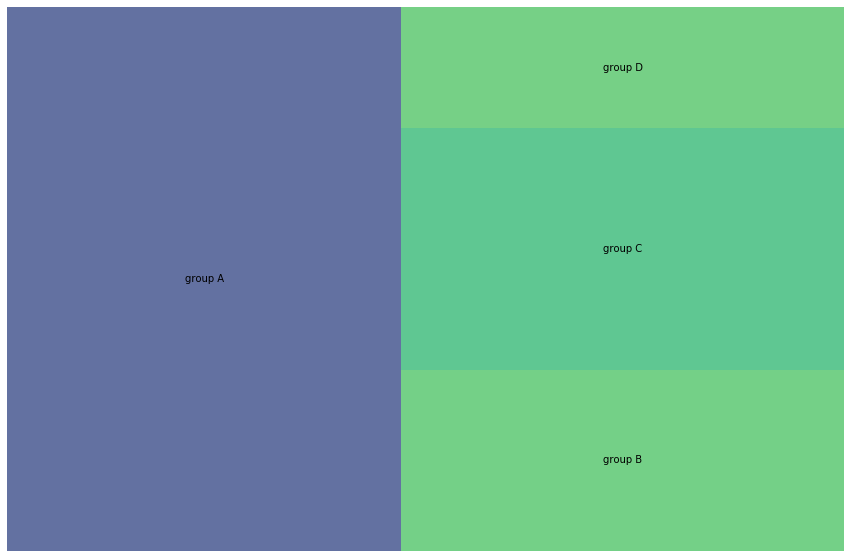

In [220]:
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

## 圖形樣式參數設定

### 顏色

通常透過修改`color`參數調整，可修改線條、點、面積等顏色，各顏色的設定方式可[參考文件](https://matplotlib.org/tutorials/colors/colors.html)，或是下圖（截自[參考文件](https://matplotlib.org/tutorials/colors/colors.html)）。

![color](color.png)

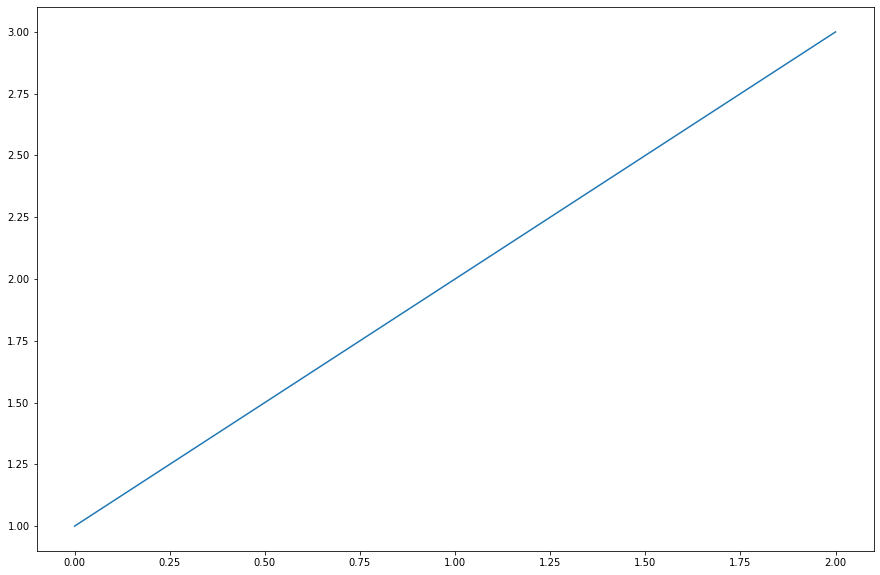

In [221]:
plt.plot([1,2,3])
plt.show()

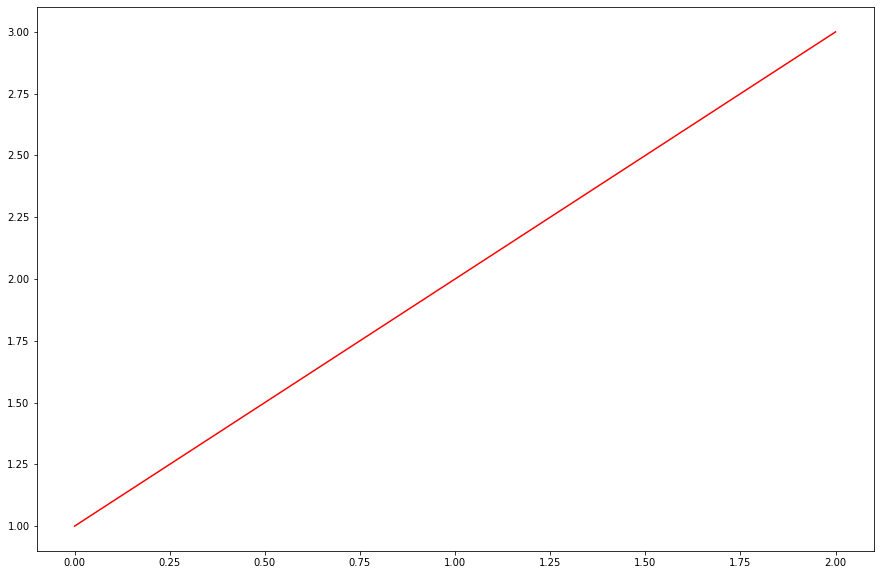

In [222]:
plt.plot([1,2,3],color="red")
plt.show()

### 點的樣式

通常透過修改`markers`參數調整，可將點改為圓形、方形等，設定可[參考文件](https://matplotlib.org/api/markers_api.html)，或是下圖（截自[參考文件](https://matplotlib.org/api/markers_api.html)）。

![markers](markers.png)


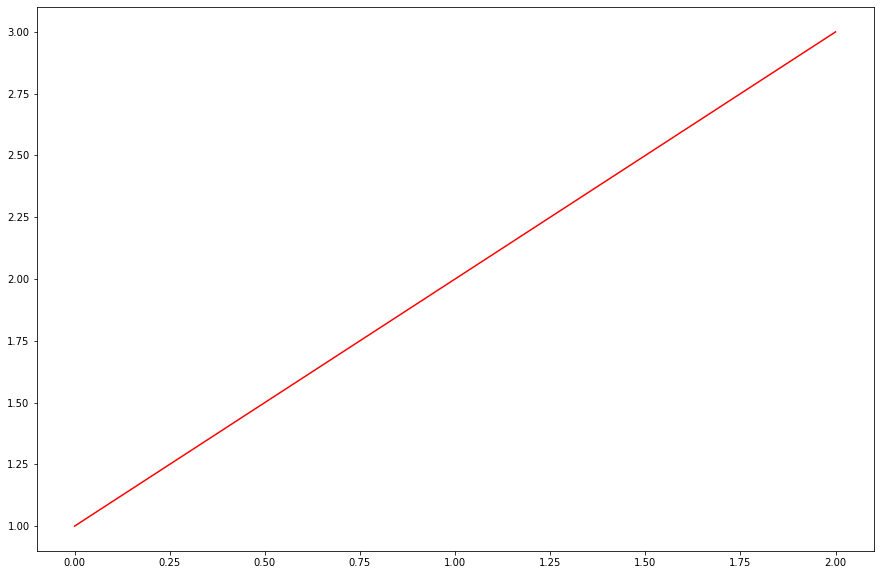

In [223]:
plt.plot([1,2,3],color="red")
plt.show()

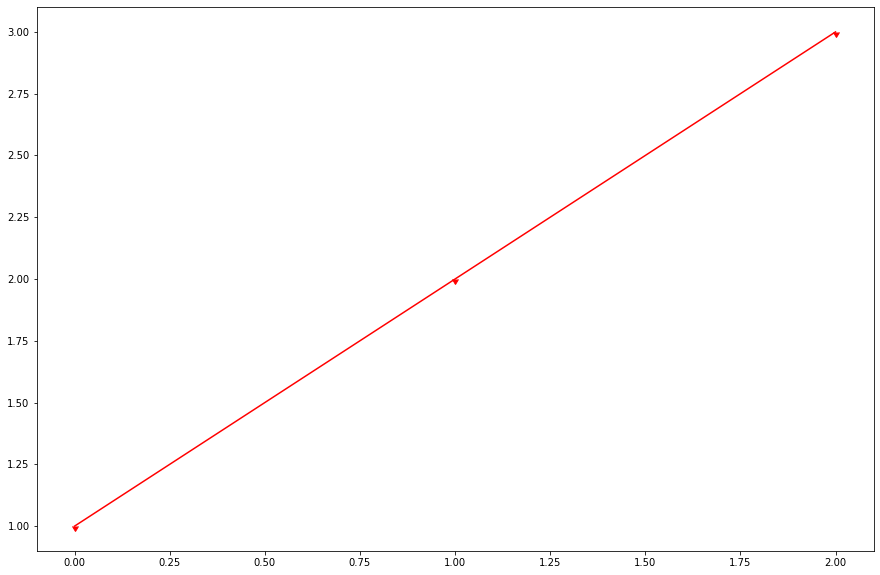

In [224]:
plt.plot([1,2,3],color="red", marker=11)
plt.show()

### 線的樣式

- linestyle: 修改線條樣式 （虛線），其他樣式設定可參考[文件](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)

![linestyles](https://matplotlib.org/3.1.0/_images/sphx_glr_linestyles_001.png)

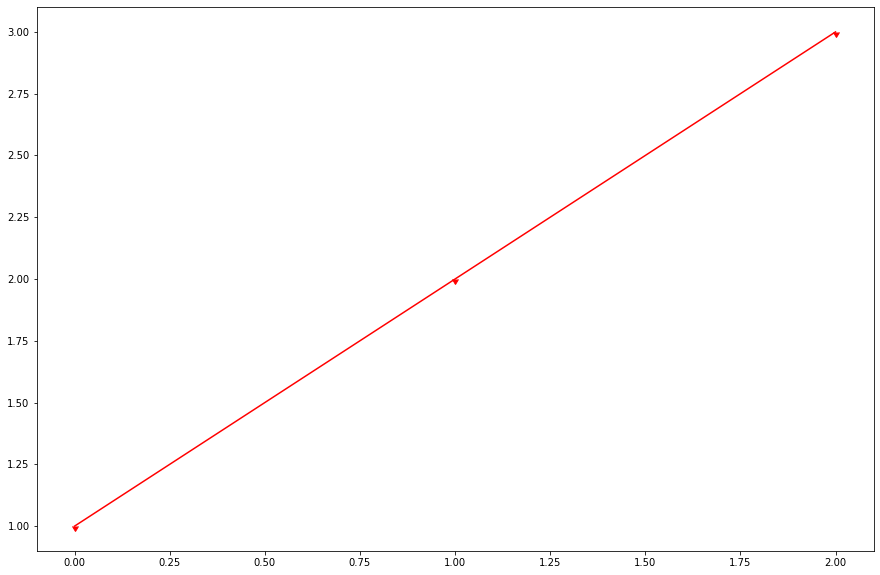

In [225]:
plt.plot([1,2,3],color="red", marker=11)
plt.show()

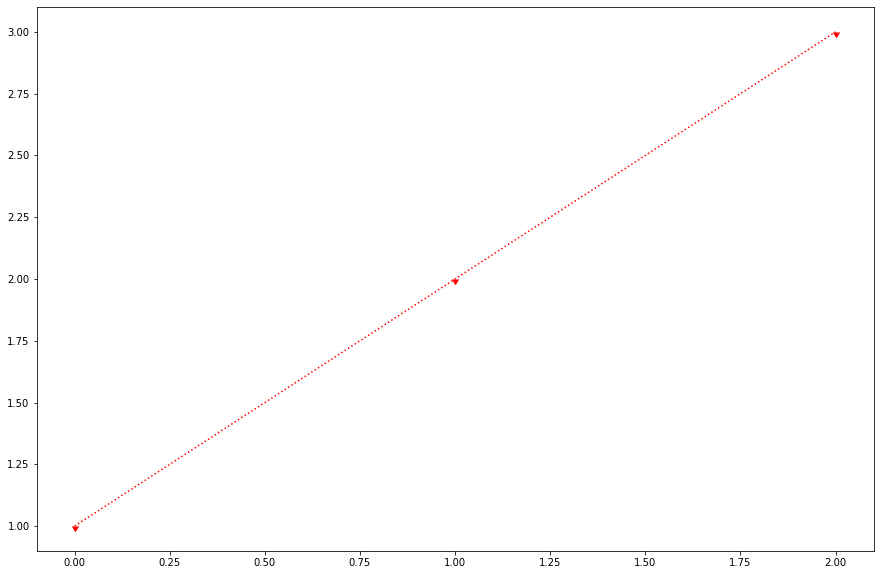

In [226]:
plt.plot([1,2,3],color="red", marker=11, linestyle='dotted')
plt.show()

### XY軸的名字

https://matplotlib.org/tutorials/introductory/pyplot.html

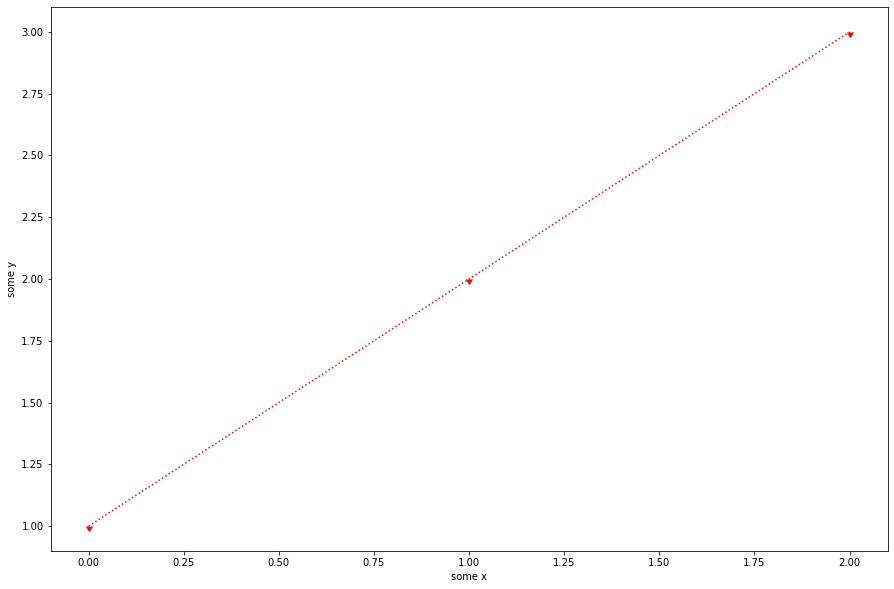

In [227]:
plt.plot([1,2,3],color="red", marker=11, linestyle='dotted')
plt.xlabel('some x')
plt.ylabel('some y')
plt.show()

### 標題

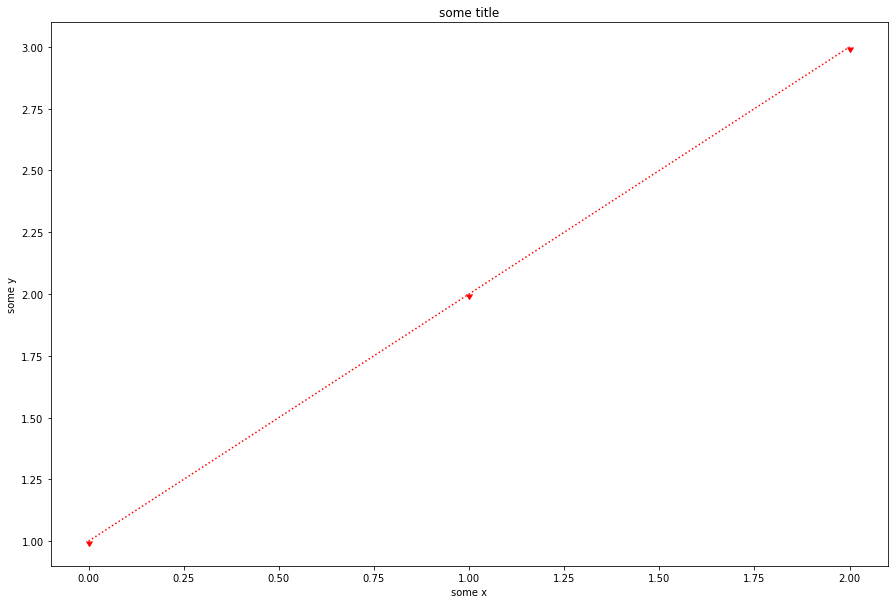

In [228]:
plt.plot([1,2,3],color="red", marker=11, linestyle='dotted')
plt.xlabel('some x')
plt.ylabel('some y')
plt.title('some title')
plt.show()

## 圖形匯出與分享

製做完圖形後，若需製作投影片或寄出分享，可使用指令儲存。

### 儲存

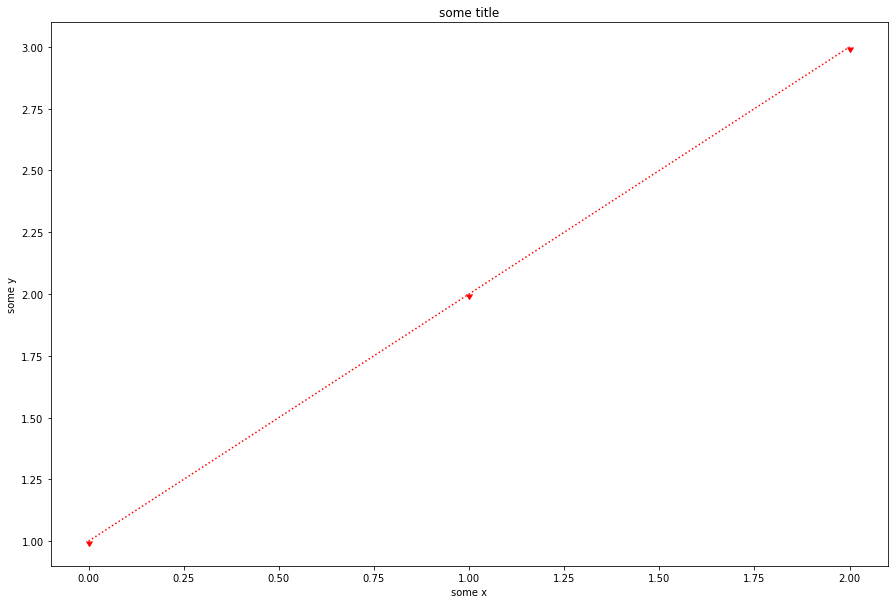

<Figure size 1080x720 with 0 Axes>

In [229]:
plt.plot([1,2,3],color="red", marker=11, linestyle='dotted')
plt.xlabel('some x')
plt.ylabel('some y')
plt.title('some title')
plt.show()
plt.savefig('saved_fig.png')

### plotly互動網頁製作

plotly是一個線上分析與視覺化的工具，如需線上作圖，可至https://plot.ly/ 建立帳號並開始作圖。Plotly也提供套件Python使用，使用者可以透過安裝plotly套件在Python中畫基於Plotly.py的圖表。

In [230]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

# Python資料視覺化參考資料

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Matplotlib官方說明文件](https://matplotlib.org/)
- [Seaborn官方說明文件](https://seaborn.pydata.org/introduction.html)